# Pymaceuticals Inc.
---

### Analysis

**Data Analysis**

Filtering ‘'Capomulin'’ Regimen:
Extracted data specific to the 'Capomulin' treatment regimen for detailed analysis.

Tumor Volume Over Time:
Created a line plot to visualize tumor volume over time for a mouse b128, treated with ‘'Capomulin'’. This helps in understanding how the treatment affects tumor growth over a period.

Mouse Weight vs. Tumor Volume:
Generated a scatter plot to visualize the relationship between mouse weight and the average observed tumor volume for the entire 'Capomulin' regimen. This helps in understanding if there is any correlation between the two variables.

**Statistical Analysis**

Correlation Calculation:
Calculated the correlation coefficient (r-value) to determine the strength and direction of the relationship between mouse weight and average tumor volume. A positive correlation (e.g., 0.84) suggests that as mouse weight increases, the tumor volume also tends to increase.

Linear Regression:
Performed linear regression analysis to predict tumor volume based on mouse weight. This plot visually represents the relationship between the variables. The scatter points show individual data points, while the regression line shows the best linear fit to the data. Added a regression line to the scatter plot to visually represent the relationship.

Findings Correlation: 
Identified a significant positive correlation between mouse weight and average tumor volume for the ‘'Capomulin'’ regimen.


Overall, the analysis helped in understanding how the ‘'Capomulin'’ treatment impacts tumor growth over time and the relationship between mouse weight and tumor volume. These insights can contribute to further research and potential treatment optimizations.




In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/GURU/Desktop/MODULE 5 CHALLENGE/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/GURU/Desktop/MODULE 5 CHALLENGE/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mouse_ids = merged_data["Mouse ID"].nunique() 
unique_mouse_ids

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_timepoints = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_timepoints["Mouse ID"].unique()
print(repr(duplicate_mouse_ids)) 

array(['g989'], dtype=object)


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]
updated_unique_mouse_ids = cleaned_data["Mouse ID"].nunique()
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mouse_ids = cleaned_data["Mouse ID"].nunique()
updated_unique_mouse_ids


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var", 
    Tumor_Volume_Std_Dev ="std",
    Tumor_Volume_Std_Err ="sem"
)
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df.columns = summary_stats_df.columns.str.replace("_", " ")
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method to produce summary statistics in a single line

columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']])
summary_stats_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)
summary_stats_df.columns = columns
summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

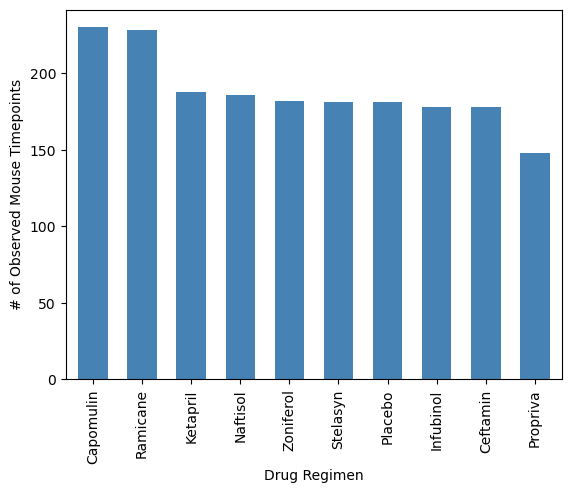

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows_per_regimen = cleaned_data["Drug Regimen"].value_counts()

total_rows_per_regimen.plot(kind="bar", color="steelblue", width=0.60)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks

plt.show()

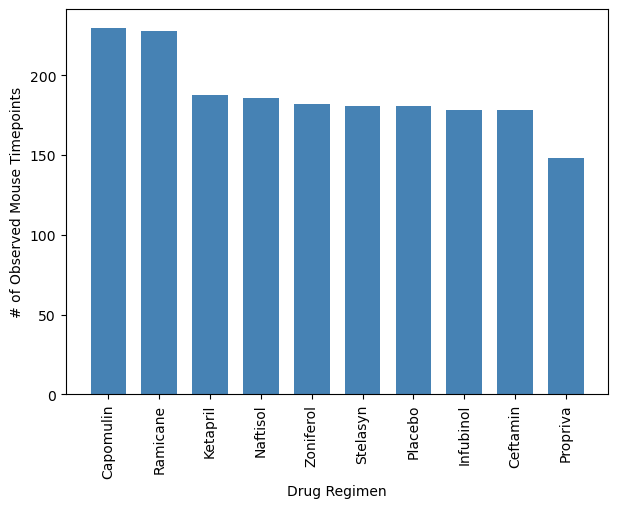

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_timepoints_per_regimen = cleaned_data["Drug Regimen"].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(total_timepoints_per_regimen.index, total_timepoints_per_regimen.values, color="steelblue", width=0.7)

# Add titles and labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()

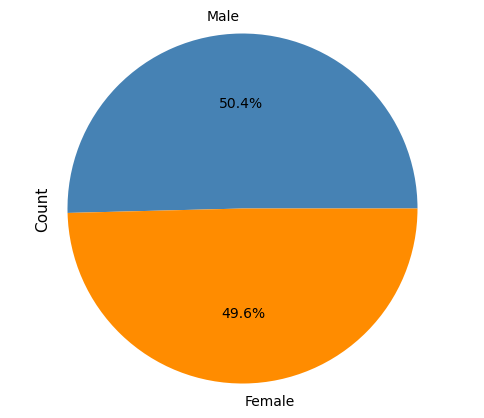

In [11]:
# Generate a pie chart, using pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
#DIFFICULT SOLUTION: GUIDED BY BCS( Saved for reference)
# Remove duplicates by "Mouse ID" and "Timepoint" first
# duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
# # Drop duplicates by "Mouse ID" to get unique mice
# unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")
# # Count male and female mice
# gender_counts = unique_mice['Sex'].value_counts()
# # Generate the pie chart
# plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])
# plt.axis('equal')
# plt.show()


# Remove duplicates by "Mouse ID" and "Timepoint" first
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Drop duplicates by "Mouse ID" to get unique mice
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")

# Count male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Matplotlib
plt.figure(figsize=(6, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.text(-1.1, 0, 'Count', fontsize=11, ha='right', va='center',rotation=90)
plt.show()


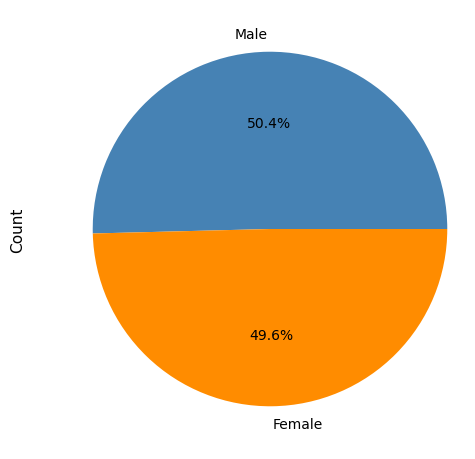

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart

fig, ax = plt.subplots(figsize=(6.5, 5.5))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])
ax.set_position([0, 0.1, 0.6, 0.8]) # [left, bottom, width, height]
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.text(-.1, 0.5, 'Count', fontsize=11, ha='left', va='center', rotation=90)
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = merged_data[merged_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoints, filtered_data, on=["Mouse ID", "Timepoint"])
merged_last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatment_regimens}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]
    tumor_volumes = treatment_data.groupby("Mouse ID")["Tumor Volume (mm3)"].last()

    # add subset
    tumor_vol_data[treatment] = tumor_volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr) 
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/7g/q4bdxd8s7xd3lw5j6j3g_m2r0000gq/T/ipykernel_15529/1248353319.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([tumor_vol_data[treatment] for treatment in treatment_regimens], labels=treatment_regimens, flierprops=flierprops)


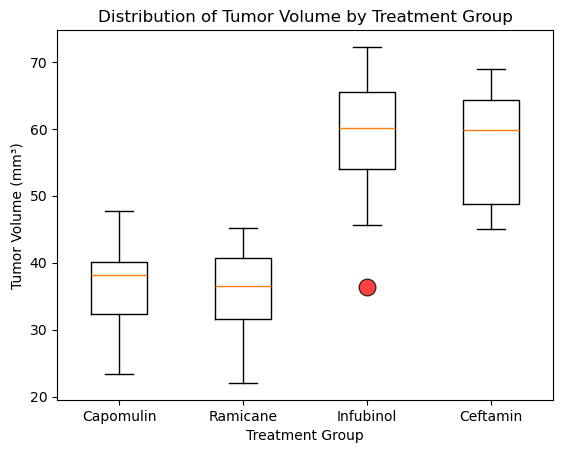

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
flierprops = dict(marker='o', color='r', markersize=12, markerfacecolor='r', alpha=0.75)
ax.boxplot([tumor_vol_data[treatment] for treatment in treatment_regimens], labels=treatment_regimens, flierprops=flierprops)
ax.set_title('Distribution of Tumor Volume by Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Tumor Volume (mm³)')
plt.show()

## Line and Scatter Plots

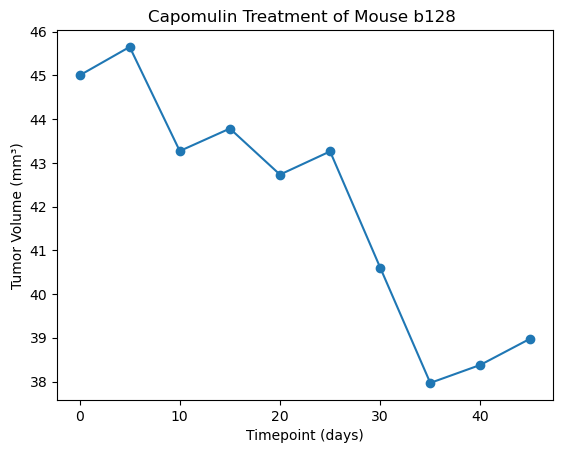

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame and you know the mouse ID you want to plot
mouse_id = 'b128'  # Replace with the actual Mouse ID

# Filter the data for the specific mouse treated with Capomulin
capomulin_data = merged_data[(merged_data["Drug Regimen"] == "Capomulin") & (merged_data["Mouse ID"] == mouse_id)]

# Plot the tumor volume vs. time point
fig, ax = plt.subplots()
ax.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o')

# Add titles and labels
ax.set_title(f'Capomulin Treatment of Mouse {mouse_id} ')
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm³)')
plt.show()

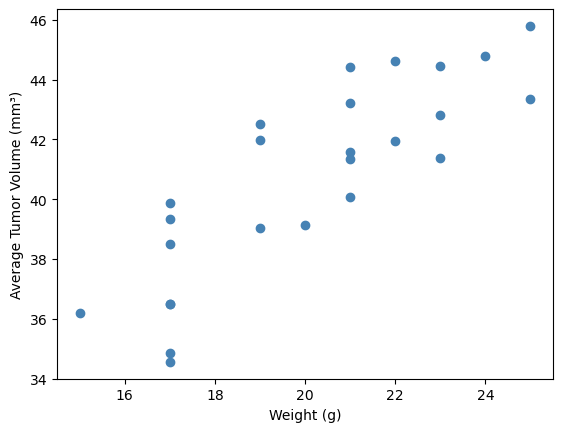

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_volume, c='steelblue') 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


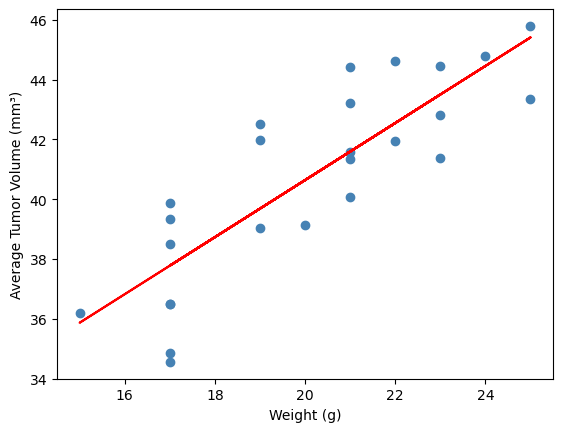

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import scipy.stats as st

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}')

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

# Create the scatter plot with regression line
plt.scatter(mouse_weight, average_tumor_volume, c='steelblue', label='Data Points')
plt.plot(mouse_weight, regress_values, c='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.show()